In [1]:
import pandas

In [2]:
data = pandas.read_csv("data/income_data.csv")

In [5]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [10]:
from sklearn.feature_selection import SelectKBest, VarianceThreshold, chi2
from sklearn.pipeline import Pipeline

In [8]:
del data['fnlwgt']

In [12]:
data.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income', 'target'],
      dtype='object')

In [14]:
feature_selector = Pipeline([('vt', VarianceThreshold(0.2*(1 - 0.2))),
                             #('skb', SelectKBest(chi2, k=10))
                            ])
feat = ['age', 'sex', 'capital-gain', 'capital-loss', 'relationship', 'education', 'hours-per-week']
X = feature_selector.fit_transform(pandas.get_dummies(data[feat], drop_first=True), data['target'])

In [56]:
X = pandas.DataFrame(X, columns=feature_selector.get_feature_names_out())
X['const'] = 1
y = data['target']

In [57]:
X.describe()

,age,capital-gain,capital-loss,hours-per-week,sex_ Male,relationship_ Not-in-family,education_ HS-grad,education_ Some-college,const
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.0
mean,38.581647,1077.648844,87.303830,40.437456,0.669205,0.255060,0.322502,0.223918,1.0
std,13.640433,7385.292085,402.960219,12.347429,0.470506,0.435901,0.467441,0.416874,0.0
min,17.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,28.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,37.000000,0.000000,0.000000,40.000000,1.000000,0.000000,0.000000,0.000000,1.0
75%,48.000000,0.000000,0.000000,45.000000,1.000000,1.000000,1.000000,0.000000,1.0
max,90.000000,99999.000000,4356.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [58]:
logit = sm.Logit(y, X).fit()
logit.summary2()

Optimization terminated successfully.
         Current function value: 0.407838
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: Logit
============================================================================
Model:                   Logit               Pseudo R-squared:    0.261     
Dependent Variable:      target              AIC:                 26577.2479
Date:                    2022-11-12 10:38    BIC:                 26652.7657
No. Observations:        32561               Log-Likelihood:      -13280.   
Df Model:                8                   LL-Null:             -17974.   
Df Residuals:            32552               LLR p-value:         0.0000    
Converged:               1.0000              Scale:               1.0000    
No. Iterations:          8.0000                                             
----------------------------------------------------------------------------
                             Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------------
age                          0.0374   0.0012  31.6470 0.0000  0.0351  0.0398
capital-gain                 0.0003   0.0000  35.5268 0.0000  0.0003  0.0003
capital-loss                 0.0008   0.0000  23.5369 0.0000  0.0007  0.0008
hours-per-week               0.0400   0.0013  30.1413 0.0000  0.0374  0.0426
sex_ Male                    0.8547   0.0396  21.5779 0.0000  0.7771  0.9323
relationship_ Not-in-family -1.3576   0.0459 -29.5875 0.0000 -1.4476 -1.2677
education_ HS-grad          -0.9381   0.0367 -25.5453 0.0000 -1.0100 -0.8661
education_ Some-college     -0.5044   0.0405 -12.4632 0.0000 -0.5837 -0.4251
const                       -4.6628   0.0848 -54.9908 0.0000 -4.8290 -4.4966
============================================================================

"""

# Reminder

In [59]:
sm.Logit(y, X[['sex_ Male']]).fit().summary2()

Optimization terminated successfully.
         Current function value: 0.641284
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: -0.162    
Dependent Variable: target           AIC:              41763.6650
Date:               2022-11-12 10:38 BIC:              41772.0558
No. Observations:   32561            Log-Likelihood:   -20881.   
Df Model:           0                LL-Null:          -17974.   
Df Residuals:       32560            LLR p-value:      nan       
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
sex_ Male    -0.8201    0.0147  -55.7758  0.0000  -0.8489  -0.7913
=================================================================

"""

In [30]:
target_by_gender = data.groupby('sex')['target'].mean()
target_by_gender

sex
 Female    0.109461
 Male      0.305737
Name: target, dtype: float64

In [31]:
import numpy

In [33]:
p = target_by_gender[' Male']
numpy.log(p / (1-p))

-0.8201275915846686

In [40]:
from sklearn.linear_model import LogisticRegression

In [63]:
del X['const']

In [64]:
sk_m = LogisticRegression(penalty='none', max_iter=1_000).fit(X, y)

In [65]:
sk_m.coef_

array([[ 3.78793576e-02,  3.30627213e-04,  7.60763527e-04,
         4.07198424e-02,  7.66148598e-01, -1.38887910e+00,
        -9.77424893e-01, -4.55343180e-01]])

In [66]:
sk_m.intercept_

array([-4.6369649])

In [67]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [68]:
tree_model = DecisionTreeClassifier(max_depth=3).fit(X, y)

In [69]:
import matplotlib.pyplot as plt

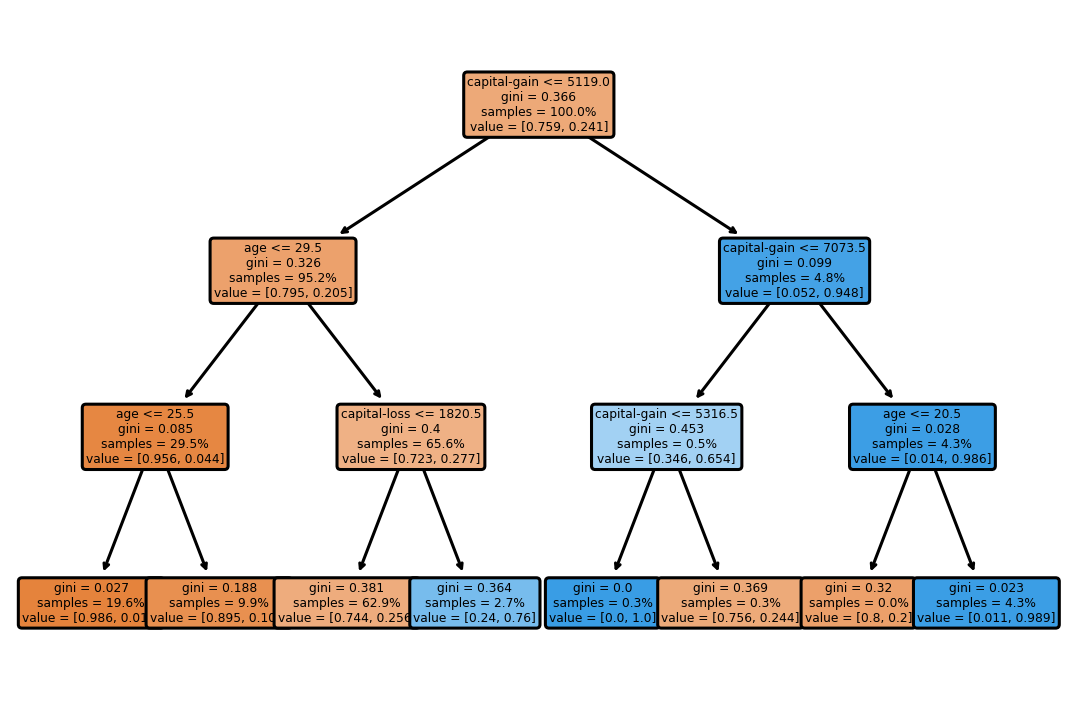

In [70]:
plt.figure(dpi=220)
plot_tree(tree_model, fontsize=4,
          filled=True, feature_names=X.columns,
          rounded=True, proportion=True)
None

In [92]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import PartialDependenceDisplay

In [93]:
gbt = GradientBoostingClassifier().fit(X, y)
knn = KNeighborsClassifier().fit(X, y)

In [94]:
X.columns

Index(['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'sex_ Male',
       'relationship_ Not-in-family', 'education_ HS-grad',
       'education_ Some-college'],
      dtype='object')

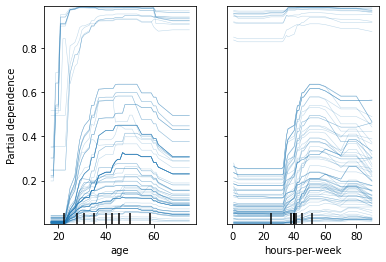

In [101]:
PartialDependenceDisplay.from_estimator(gbt, X.sample(100),
                                        ['age', 'hours-per-week'],
                                       kind='individual')

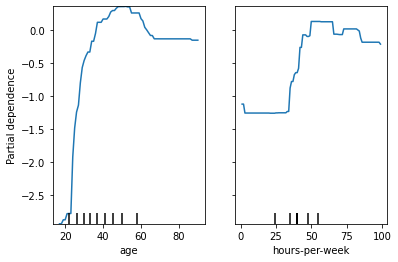

In [99]:
PartialDependenceDisplay.from_estimator(gbt, X,
                                        ['age', 'hours-per-week'])

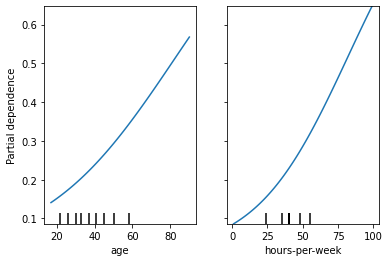

In [105]:
PartialDependenceDisplay.from_estimator(LogisticRegression(max_iter=1_000).fit(X, y), X,
                                        ['age', 'hours-per-week'])

In [84]:
from sklearn.model_selection import cross_val_score

In [88]:
cross_val_score(GradientBoostingClassifier(), X, y, cv=20)

array([0.82995703, 0.83845209, 0.84336609, 0.83292383, 0.83476658,
       0.83845209, 0.83906634, 0.83968059, 0.84090909, 0.83660934,
       0.84766585, 0.84520885, 0.83538084, 0.83108108, 0.84275184,
       0.84643735, 0.83906634, 0.84336609, 0.83783784, 0.83046683])

In [90]:
cross_val_score(LogisticRegression(max_iter=1_000), X, y, cv=20)

array([0.81031308, 0.80958231, 0.80651106, 0.8022113 , 0.7972973 ,
       0.80159705, 0.79668305, 0.81203931, 0.81449631, 0.8022113 ,
       0.81019656, 0.81388206, 0.8009828 , 0.79791155, 0.81941032,
       0.8046683 , 0.81388206, 0.80036855, 0.81388206, 0.79299754])

<AxesSubplot:>

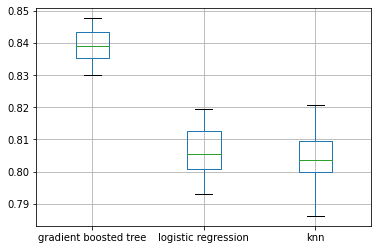

In [103]:
pandas.DataFrame(
    {'gradient boosted tree': cross_val_score(GradientBoostingClassifier(), X, y, cv=20),
     'logistic regression': cross_val_score(LogisticRegression(max_iter=1_000), X, y, cv=20),
     'knn': cross_val_score(KNeighborsClassifier(), X / X.std(), y, cv=20)}).boxplot()

In [106]:
import shap

In [107]:
shap.initjs()

In [108]:
def model_adult_proba(x):
    return sk_m.predict_proba(x)[:,1]
def model_adult_log_odds(x):
    p = sk_m.predict_log_proba(x)
    return p[:,1] - p[:,0]

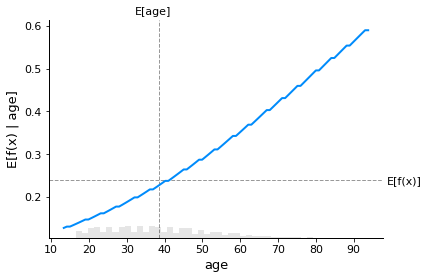

In [143]:
# make a standard partial dependence plot
fig,ax = shap.partial_dependence_plot(
    "age", model_adult_proba, X, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False
)

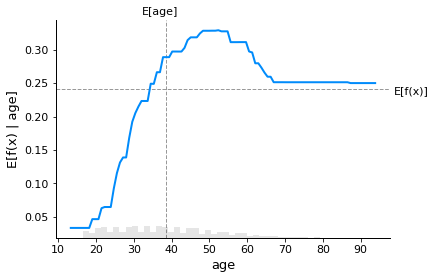

In [145]:
# make a standard partial dependence plot
fig,ax = shap.partial_dependence_plot(
    "age", lambda x: gbt.predict_proba(x)[:,1], X, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False
)

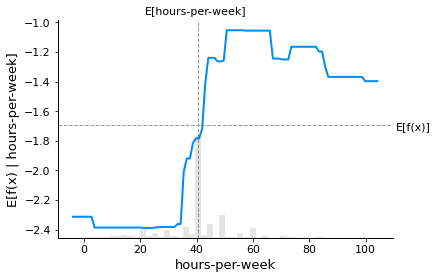

In [150]:
# make a standard partial dependence plot
fig,ax = shap.partial_dependence_plot(
    "hours-per-week", lambda x: gbt.predict_log_proba(x)[:,1] - gbt.predict_log_proba(x)[:,0], X, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False
)

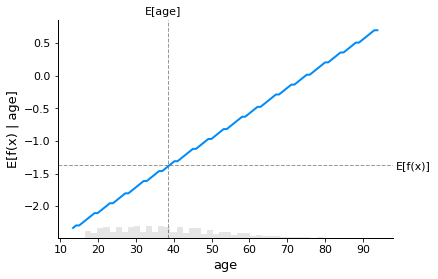

In [144]:
# make a standard partial dependence plot
fig,ax = shap.partial_dependence_plot(
    "age", model_adult_log_odds, X, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False
)

In [151]:
background_adult = shap.maskers.Independent(X, max_samples=100)
explainer = shap.Explainer(model_adult_proba, background_adult)
shap_values_adult = explainer(X[:1000])

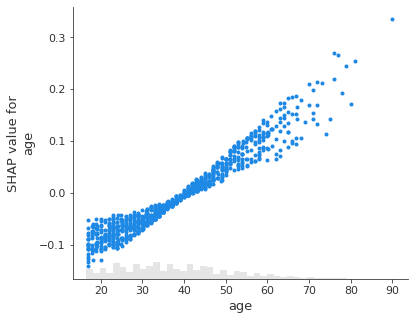

In [152]:
shap.plots.scatter(shap_values_adult[:,"age"])

In [113]:
explainer_log_odds = shap.Explainer(model_adult_log_odds, background_adult)
shap_values_adult_log_odds = explainer_log_odds(X[:1000])

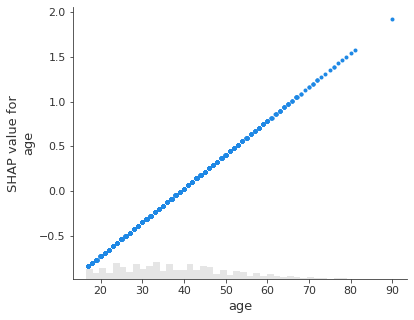

In [114]:
shap.plots.scatter(shap_values_adult_log_odds[:,"age"])

In [153]:
sk_ex = shap.LinearExplainer(sk_m, X)

In [154]:
sk_shap_values = sk_ex(X)

In [155]:
shap.force_plot(shap_values_adult[10])

In [156]:
X.iloc[10]

age                            37
capital-gain                    0
capital-loss                    0
hours-per-week                 80
sex_ Male                       1
relationship_ Not-in-family     0
education_ HS-grad              0
education_ Some-college         1
Name: 10, dtype: int64

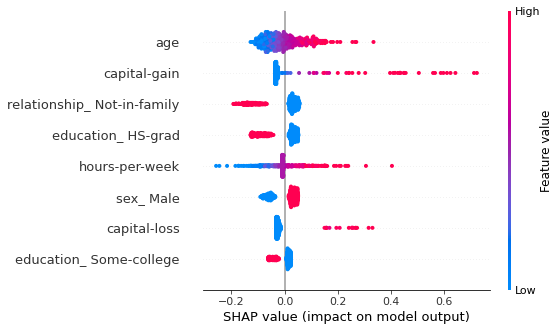

In [157]:
shap.summary_plot(shap_values_adult.sample(500))

<AxesSubplot:>

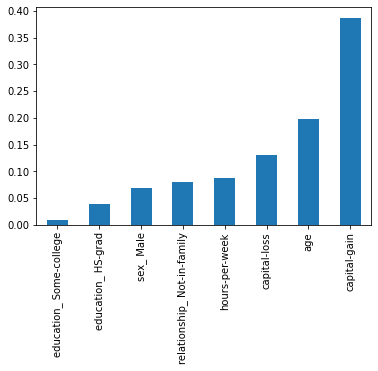

In [189]:
pandas.Series(gbt.feature_importances_, index=X.columns).sort_values().plot.bar()

In [190]:
gb_explainer = shap.Explainer(gbt, X)
gb_shap_values = gb_explainer(X.sample(5_000))

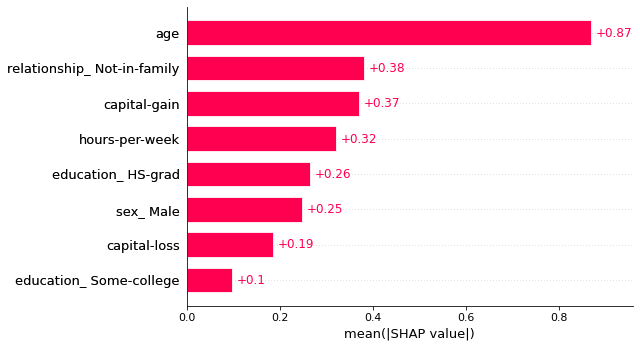

In [191]:
shap.plots.bar(gb_shap_values)

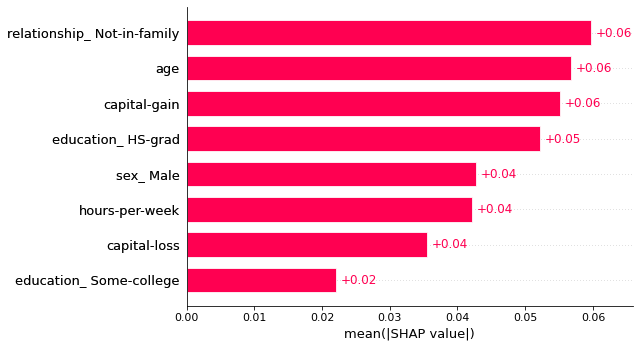

In [192]:
shap.plots.bar(shap_values_adult)

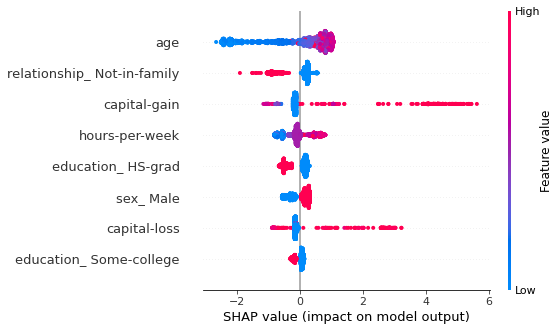

In [193]:
shap.summary_plot(gb_shap_values)

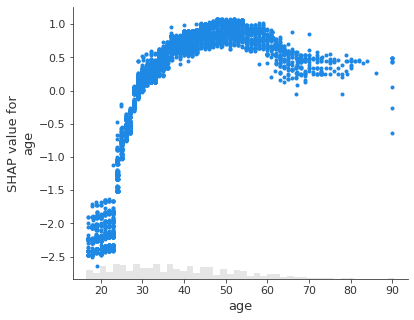

In [194]:
shap.plots.scatter(gb_shap_values[:,"age"])

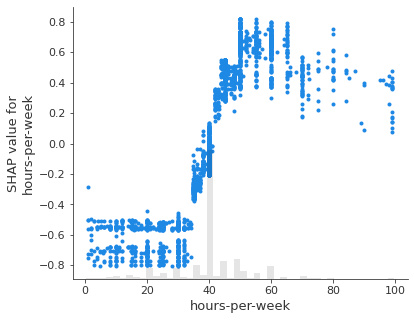

In [195]:
shap.plots.scatter(gb_shap_values[:,"hours-per-week"])

In [196]:
shap.force_plot(gb_shap_values[10])